# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 599


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = f'https://api.openweathermap.org/data/2.5/weather'

params = {
    "q": " ",
    "appid": weather_api_key
}

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
        
    params["q"]= city

    # Create endpoint URL with each city
    city_url = requests.get(url, params=params)
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = city_url.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except Exception as e:
        print(e)
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | mericleri
'coord'
City not found. Skipping...
Processing Record 2 of Set 1 | berlevag
Processing Record 3 of Set 1 | kabala
Processing Record 4 of Set 1 | kayes
Processing Record 5 of Set 1 | lompoc
Processing Record 6 of Set 1 | bekescsaba
Processing Record 7 of Set 1 | albany
Processing Record 8 of Set 1 | bengkulu
Processing Record 9 of Set 1 | ekibastuz
Processing Record 10 of Set 1 | shaoguan
Processing Record 11 of Set 1 | port alfred
Processing Record 12 of Set 1 | yellowknife
Processing Record 13 of Set 1 | hilo
Processing Record 14 of Set 1 | hobart
Processing Record 15 of Set 1 | khatanga
Processing Record 16 of Set 1 | alofi
Processing Record 17 of Set 1 | sentyabrskiy
'coord'
City not found. Skipping...
Processing Record 18 of Set 1 | busselton
Processing Record 19 of Set 1 | louisbourg
'coord'
City not found. Skipping...
Processing Record 20 of Set 1 | mataura
Processing Record 21 of

Processing Record 33 of Set 4 | klaksvik
Processing Record 34 of Set 4 | pochutla
Processing Record 35 of Set 4 | vanimo
Processing Record 36 of Set 4 | lucapa
Processing Record 37 of Set 4 | nome
Processing Record 38 of Set 4 | negotino
Processing Record 39 of Set 4 | fuyu
Processing Record 40 of Set 4 | ningan
'coord'
City not found. Skipping...
Processing Record 41 of Set 4 | portland
Processing Record 42 of Set 4 | itaituba
Processing Record 43 of Set 4 | kampong thum
Processing Record 44 of Set 4 | torbay
Processing Record 45 of Set 4 | sur
Processing Record 46 of Set 4 | bethel
Processing Record 47 of Set 4 | nikki
Processing Record 48 of Set 4 | namatanai
Processing Record 49 of Set 4 | ballina
Processing Record 0 of Set 5 | emba
Processing Record 1 of Set 5 | callaway
Processing Record 2 of Set 5 | yumaguzino
Processing Record 3 of Set 5 | gigmoto
Processing Record 4 of Set 5 | oranjestad
Processing Record 5 of Set 5 | soyo
Processing Record 6 of Set 5 | norman wells
Processing

Processing Record 17 of Set 8 | cururupu
Processing Record 18 of Set 8 | miri
Processing Record 19 of Set 8 | port shepstone
Processing Record 20 of Set 8 | ketchikan
Processing Record 21 of Set 8 | tura
Processing Record 22 of Set 8 | lolua
'coord'
City not found. Skipping...
Processing Record 23 of Set 8 | ugrinovci
Processing Record 24 of Set 8 | bodden town
Processing Record 25 of Set 8 | shenjiamen
Processing Record 26 of Set 8 | san policarpo
Processing Record 27 of Set 8 | caravelas
Processing Record 28 of Set 8 | carballo
Processing Record 29 of Set 8 | wharton
Processing Record 30 of Set 8 | conde
Processing Record 31 of Set 8 | santa cruz de tenerife
Processing Record 32 of Set 8 | clarence town
Processing Record 33 of Set 8 | zyryanka
Processing Record 34 of Set 8 | mayo
Processing Record 35 of Set 8 | san andres
Processing Record 36 of Set 8 | tuktoyaktuk
Processing Record 37 of Set 8 | luderitz
Processing Record 38 of Set 8 | jinka
Processing Record 39 of Set 8 | alice tow

Processing Record 5 of Set 12 | monte patria
Processing Record 6 of Set 12 | sibolga
Processing Record 7 of Set 12 | bargal
'coord'
City not found. Skipping...
Processing Record 8 of Set 12 | humaita
Processing Record 9 of Set 12 | ellensburg
Processing Record 10 of Set 12 | marawi
Processing Record 11 of Set 12 | selcuk
Processing Record 12 of Set 12 | galesong
Processing Record 13 of Set 12 | port moresby
Processing Record 14 of Set 12 | mahina
Processing Record 15 of Set 12 | glenwood springs
Processing Record 16 of Set 12 | port macquarie
Processing Record 17 of Set 12 | srednekolymsk
Processing Record 18 of Set 12 | san carlos
Processing Record 19 of Set 12 | ajuchitlan
Processing Record 20 of Set 12 | utiroa
'coord'
City not found. Skipping...
Processing Record 21 of Set 12 | touros
Processing Record 22 of Set 12 | skala
Processing Record 23 of Set 12 | kirakira
Processing Record 24 of Set 12 | umzimvubu
'coord'
City not found. Skipping...
Processing Record 25 of Set 12 | talnakh

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          549
Lat           549
Lng           549
Max Temp      549
Humidity      549
Cloudiness    549
Wind Speed    549
Country       549
Date          549
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,berlevag,70.8578,29.0864,270.12,63,75,10.29,NO,1679347761
1,kabala,9.5833,-11.5500,300.81,41,33,4.24,SL,1679347762
2,kayes,14.0000,-11.0000,305.86,9,0,2.89,ML,1679347763
3,lompoc,34.6391,-120.4579,290.25,76,100,4.92,US,1679347764
4,bekescsaba,46.6833,21.1000,283.12,70,100,1.34,HU,1679347765


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,berlevag,70.8578,29.0864,270.12,63,75,10.29,NO,1679347761
1,kabala,9.5833,-11.5500,300.81,41,33,4.24,SL,1679347762
2,kayes,14.0000,-11.0000,305.86,9,0,2.89,ML,1679347763
3,lompoc,34.6391,-120.4579,290.25,76,100,4.92,US,1679347764
4,bekescsaba,46.6833,21.1000,283.12,70,100,1.34,HU,1679347765


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

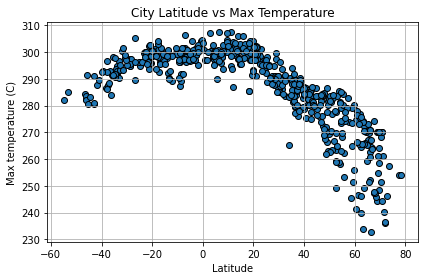

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(x= city_data_df["Lat"], y=city_data_df["Max Temp"], edgecolors = "black")

# Incorporate the other graph properties
plt.title("City Latitude vs Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max temperature (C)")
plt.grid()
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

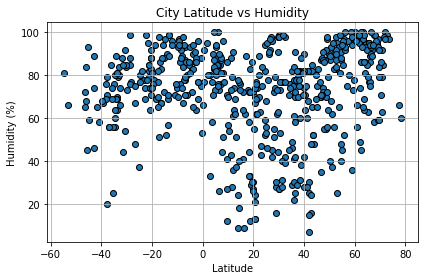

In [9]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(x= city_data_df["Lat"], y=city_data_df["Humidity"], edgecolors = "black")


# Incorporate the other graph properties
plt.title("City Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

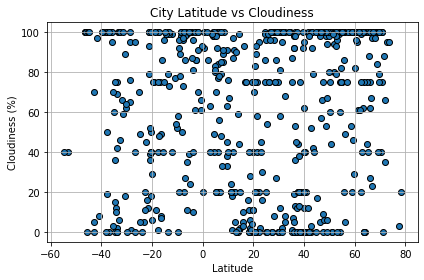

In [10]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(x= city_data_df["Lat"], y=city_data_df["Cloudiness"], edgecolors = "black")

# Incorporate the other graph properties
plt.title("City Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.tight_layout()
# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

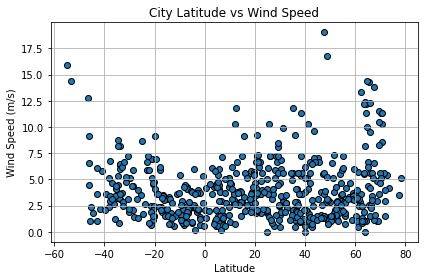

In [11]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(x= city_data_df["Lat"], y=city_data_df["Wind Speed"], edgecolors = "black")

# Incorporate the other graph properties
plt.title("City Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid()
plt.tight_layout()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, title, text_coordinates):
    
    # Compute linear regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    # Plot
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel("Latitude")
    plt.ylabel(title)
    print(f"The r-value is: {rvalue**2}")
    plt.show()


In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"]>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,berlevag,70.8578,29.0864,270.12,63,75,10.29,NO,1679347761
1,kabala,9.5833,-11.5500,300.81,41,33,4.24,SL,1679347762
2,kayes,14.0000,-11.0000,305.86,9,0,2.89,ML,1679347763
3,lompoc,34.6391,-120.4579,290.25,76,100,4.92,US,1679347764
4,bekescsaba,46.6833,21.1000,283.12,70,100,1.34,HU,1679347765


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"]<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
6,bengkulu,-3.8004,102.2655,297.15,90,96,2.28,ID,1679347398
9,port alfred,-33.5906,26.8910,293.60,79,100,3.09,ZA,1679347768
12,hobart,-42.8794,147.3294,280.40,89,0,3.60,AU,1679347165
14,alofi,-19.0595,-169.9187,301.09,78,75,3.60,NU,1679347771
15,busselton,-33.6500,115.3333,293.14,64,2,6.33,AU,1679347350


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.767183716768304


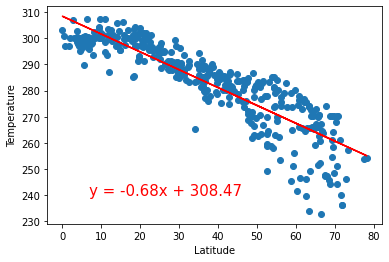

In [23]:
# Linear regression on Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], "Temperature", (7,240))



The r-value is: 0.44956019374504325


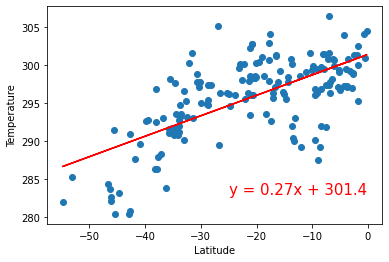

In [26]:
# Linear regression on Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], "Temperature", (-25,283))


**Discussion about the linear relationship:** 
There appears to be a strong negative correlation between temperature and latitude within the Northern Hemisphere. The same is not true for the Southern Hemisphere, which appears to have a weak positive correlation. 

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.07991950858006505


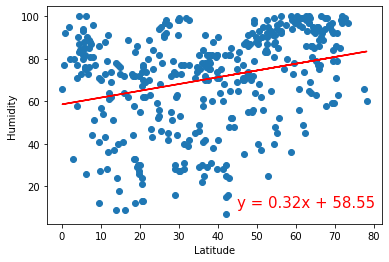

In [28]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], "Humidity", (45,10))


The r-value is: 0.13526428175030863


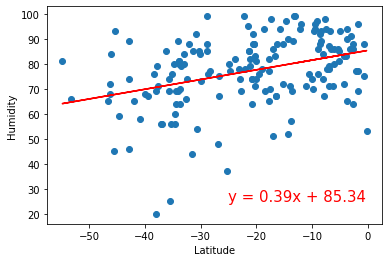

In [31]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], "Humidity", (-25,25))


**Discussion about the linear relationship:** 

In both the Northern and Southern Hemisphere, no clear correlation can be shown between latitude and humidity. Although at first glance the linear regression appears to indicate a potential positive correlation, the strength of both r-values are less than 0.3, which typically indicates a non-existent, or very weak strength of relationship. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.03483514949970749


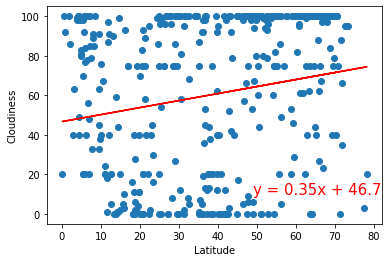

In [34]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], "Cloudiness", (49,10))


The r-value is: 0.03866706734100759


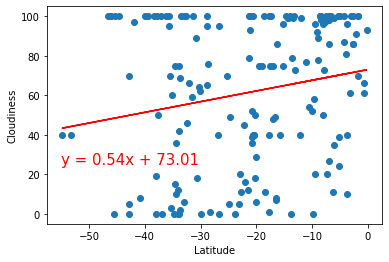

In [38]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], "Cloudiness", (-55,25))


**Discussion about the linear relationship:** 

In both the Northern and Southern Hemisphere, no clear correlation can be shown between latitude and cloudiness. Although at first glance the angle of the line appears to indicate a potential positive correlation, the strength of both r-values are less than 0.3, which typically indicates a non-existent, or very weak strength of relationship. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.023066487279476255


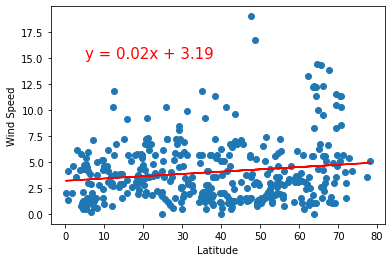

In [39]:
# Northern Hemisphere
plot_linear_regression(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], "Wind Speed", (5,15))


The r-value is: 0.21833930452435327


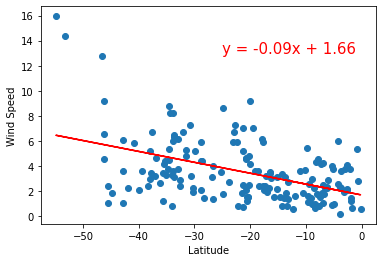

In [41]:
# Southern Hemisphere
plot_linear_regression(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], "Wind Speed", (-25,13))


**Discussion about the linear relationship:** 

In both the Northern and Southern Hemisphere, no clear correlation can be shown between latitude and humidity. Although at first glance the linear regression of the Northern Hemisphere appears to indicate a potential positive correlation and the linear regression of the Southern Hemisphere appears to potentially indicate a negative correlation, the strength of both r-values are less than 0.3, which typically indicates a non-existent, or very weak strength of relationship. 